In [1]:
import commot as ct
import scanpy as sc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:

adata = sc.datasets.visium_sge(sample_id='V1_Mouse_Brain_Sagittal_Posterior')
adata.var_names_make_unique()

sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)



  0%|          | 0.00/20.1M [00:00<?, ?B/s]

In [4]:
adata.write_h5ad('test_run.h5ad')

In [5]:

ct.pp.ligand_receptor_database()
df_ligrec=ct.pp.ligand_receptor_database(database='CellChat', species='mouse')

LR=np.array([['Tgfb1', 'Tgfbr1_Tgfbr2', 'Tgfb_pathway'],
    ['Tgfb2', 'Tgfbr1_Tgfbr2', 'Tgfb_pathway'],
    ['Tgfb3', 'Tgfbr1_Tgfbr2', 'Tgfb_pathway'],
    ['Fgf1', 'Fgfr1', 'FGF_pathway'],
    ['Fgf1', 'Fgfr2', 'FGF_pathway']],dtype=str)
df_ligrec = pd.DataFrame(data=LR)

In [6]:
df_cellchat = ct.pp.ligand_receptor_database(species='mouse', signaling_type='Secreted Signaling', database='CellChat')
print(df_cellchat.shape)

(1209, 4)


In [9]:
adata

AnnData object with n_obs × n_vars = 3355 × 32285
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'log1p'
    obsm: 'spatial'

In [8]:
adata_dis500 = adata.copy()


In [10]:
df_cellchat_filtered = ct.pp.filter_lr_database(df_cellchat, adata_dis500, min_cell_pct=0.05)
print(df_cellchat_filtered.shape)

(250, 4)


In [11]:
print(df_cellchat_filtered.head())


       0              1     2                   3
0  Tgfb1  Tgfbr1_Tgfbr2  TGFb  Secreted Signaling
1  Tgfb2  Tgfbr1_Tgfbr2  TGFb  Secreted Signaling
2  Tgfb3  Tgfbr1_Tgfbr2  TGFb  Secreted Signaling
3  Tgfb1  Acvr1b_Tgfbr2  TGFb  Secreted Signaling
4  Tgfb1  Acvr1c_Tgfbr2  TGFb  Secreted Signaling


In [12]:
ct.tl.spatial_communication(adata_dis500,
    database_name='cellchat', df_ligrec=df_cellchat_filtered, dis_thr=500, heteromeric=True, pathway_sum=True)

In [13]:
adata_dis500.write("test_output.h5ad")


<Axes: >

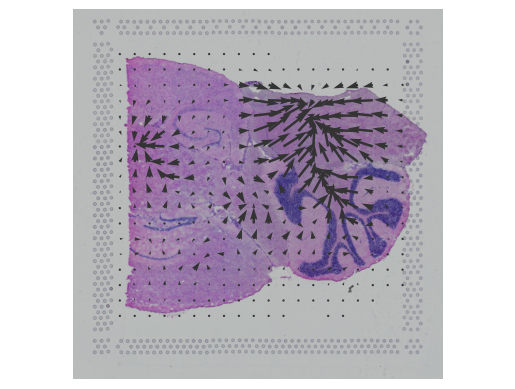

In [14]:
ct.tl.communication_direction(adata_dis500, database_name='cellchat', pathway_name='PSAP', k=5)
ct.pl.plot_cell_communication(adata_dis500, database_name='cellchat', pathway_name='PSAP', plot_method='grid', background_legend=True,
    scale=0.00003, ndsize=8, grid_density=0.4, summary='sender', background='image', clustering='leiden', cmap='Alphabet',
    normalize_v = True, normalize_v_quantile=0.995)